In [1]:
import os
import sys
import shutil
import math
import warnings
from typing import *
from enum import Enum
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from QuantificationScripts.NucleationAndPropagationMeasurements import *

In [2]:
exps_dir_name = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData"
exp_names = [
'5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv',
'2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv',
'2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv',
'2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv'
             ]

# NI calculation

In [3]:
only_recent_death_flag_for_neighbors_calc = False
p_nucs_by_exp_name = {}
global_density_by_exp_name = {}
sliding_time_window_size = 20
neighbors_dist_threshold = 250
meta_data_file_full_path = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/2023ExperimentsMetaData.csv"
meta_data_df = pd.read_csv(meta_data_file_full_path)

for exp_name in exp_names:
    print(f"Analyzing exp: {exp_name}")
    file_full_path = os.path.join(exps_dir_name, exp_name)
    p_nuc_by_time, p_prop_by_time, p_nuc_global, p_prop_global, \
            all_frames_nucleators_mask, all_frames_propagators_mask, \
            accumulated_fraction_of_death_by_time = \
                calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_explicit_temporal_resolution(
                    single_exp_full_path=file_full_path,
                    dist_threshold = neighbors_dist_threshold,
                    sliding_time_window_size=sliding_time_window_size,
                    only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
                meta_data_path=meta_data_file_full_path)
    print(f"NI: {p_nuc_global}\n{'#'*30}")
    exp_meta_data = meta_data_df[meta_data_df['File Name'] == exp_name]
    global_density_by_exp_name[exp_name] = exp_meta_data['Density(#Cells)'].values[0]
    p_nucs_by_exp_name[exp_name] = p_nuc_global

Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.13163972286374134
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
NI: 0.1588785046728972
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
NI: 0.18478260869565216
##############################
Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.14233576642335766
##############################


### Plot the results (P(Nuc)/GlobalDensity)

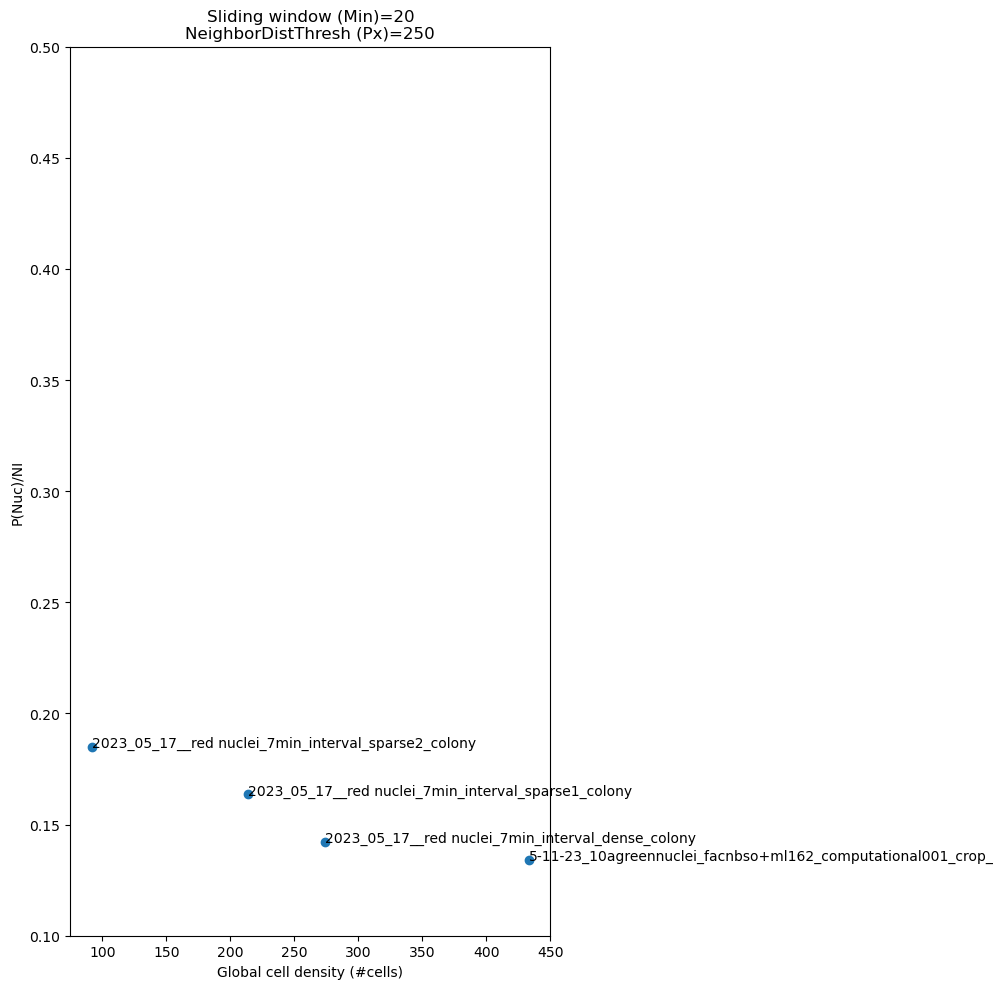

In [45]:
fig, axis = plt.subplots(figsize=(10, 10))
axis.scatter(list(global_density_by_exp_name.values()), list(p_nucs_by_exp_name.values()))
for exp_name, exp_density in global_density_by_exp_name.items():
    exp_p_nuc = p_nucs_by_exp_name[exp_name]
    # just hardcoded strings cleaning for a shorter version.
    beautified_exp_name = exp_name.replace('_death_times_no_reapearing_death_events.csv', '')
    beautified_exp_name = beautified_exp_name.replace('2023_05_10', '')
    beautified_exp_name = beautified_exp_name.replace('2023_05_11', '')
    beautified_exp_name = beautified_exp_name.replace('2023_05_17_2023_05_10_red', '')
    axis.text(exp_density, exp_p_nuc, beautified_exp_name)
axis.set_ylim([0.1, 0.5])
axis.set_title(f"Sliding window (Min)={sliding_time_window_size}\nNeighborDistThresh (Px)={neighbors_dist_threshold}")
axis.set_xlabel('Global cell density (#cells)')
axis.set_ylabel('P(Nuc)/NI')
plt.tight_layout()
plt.show()

### Investigating parameters effects

#### investigating effects of sliding time window size

Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.11778290993071594
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
NI: 0.1542056074766355
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
NI: 0.17391304347826086
##############################
Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.14233576642335766
##############################
433 0.11778290993071594 Dense
214 0.1542056074766355 Sparse
92 0.17391304347826086 Sparse
274 0.14233576642335766 Dense
Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.131639722863741

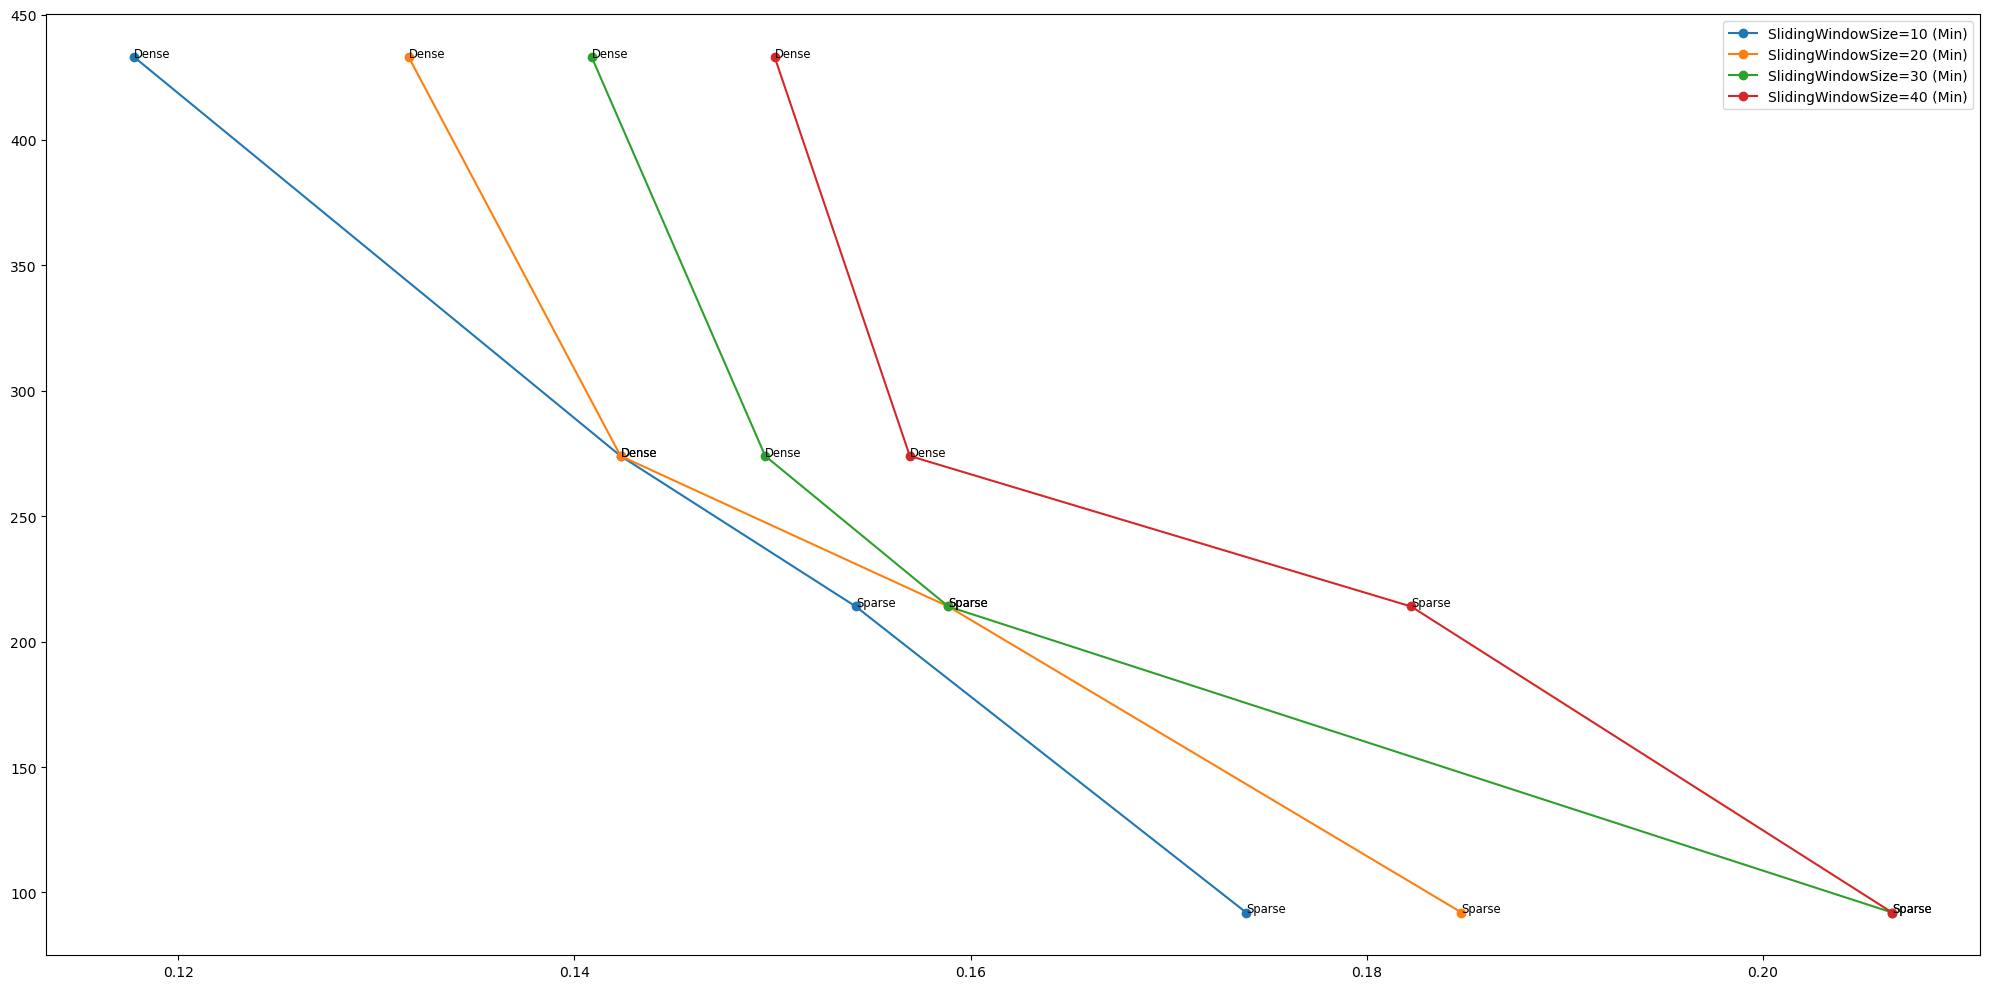

In [19]:
only_recent_death_flag_for_neighbors_calc = False
# sliding_time_window_size = 20
neighbors_dist_threshold = 250
meta_data_file_full_path = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/2023ExperimentsMetaData.csv"
meta_data_df = pd.read_csv(meta_data_file_full_path)
fig, axis = plt.subplots(figsize=(20, 10))
exp_density_levels_by_exp_name = {}
for sliding_time_window_size in (10, 20, 30, 40):
    p_nucs_by_exp_name = {}
    global_density_by_exp_name = {}
    for exp_name in exp_names:
        exp_density_levels_by_exp_name[exp_name] = 'Dense' if 'dense' in exp_name.lower() else 'Sparse'
        print(f"Analyzing exp: {exp_name}")
        file_full_path = os.path.join(exps_dir_name, exp_name)
        p_nuc_by_time, p_prop_by_time, p_nuc_global, p_prop_global, \
                all_frames_nucleators_mask, all_frames_propagators_mask, \
                accumulated_fraction_of_death_by_time = \
                    calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_explicit_temporal_resolution(
                        single_exp_full_path=file_full_path,
                        dist_threshold = neighbors_dist_threshold,
                        sliding_time_window_size=sliding_time_window_size,
                        only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
                    meta_data_path=meta_data_file_full_path)
        print(f"NI: {p_nuc_global}\n{'#'*30}")
        exp_meta_data = meta_data_df[meta_data_df['File Name'] == exp_name]
        global_density_by_exp_name[exp_name] = exp_meta_data['Density(#Cells)'].values[0]
        p_nucs_by_exp_name[exp_name] = p_nuc_global

    sorted_values = list(zip(*list(sorted(zip(list(global_density_by_exp_name.values()), list(p_nucs_by_exp_name.values()))))))
    axis.plot(sorted_values[1], sorted_values[0], label=f"SlidingWindowSize={sliding_time_window_size} (Min)", marker='o')
    for exp_name, exp_density_tag in exp_density_levels_by_exp_name.items():
        exp_density, exp_p_nuc = global_density_by_exp_name[exp_name], p_nucs_by_exp_name[exp_name]
        print(exp_density, exp_p_nuc, exp_density_tag)
        axis.text(exp_p_nuc, exp_density, exp_density_tag, {'fontsize': 'small'})

plt.legend()
plt.tight_layout()
plt.show()

#### investigating effects of neighbors distance threshold

Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.13394919168591224
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse1_colony_death_times_no_reapearing_death_events.csv
NI: 0.16822429906542055
##############################
Analyzing exp: 2023_05_17_2023_05_10_red nuclei_7min_interval_sparse2_colony_death_times_no_reapearing_death_events.csv
NI: 0.391304347826087
##############################
Analyzing exp: 2023_05_17_2023_05_11_red nuclei_7min_interval_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.14233576642335766
##############################
433 0.13394919168591224 Dense
214 0.16822429906542055 Sparse
92 0.391304347826087 Sparse
274 0.14233576642335766 Dense
Analyzing exp: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
NI: 0.13163972286374134

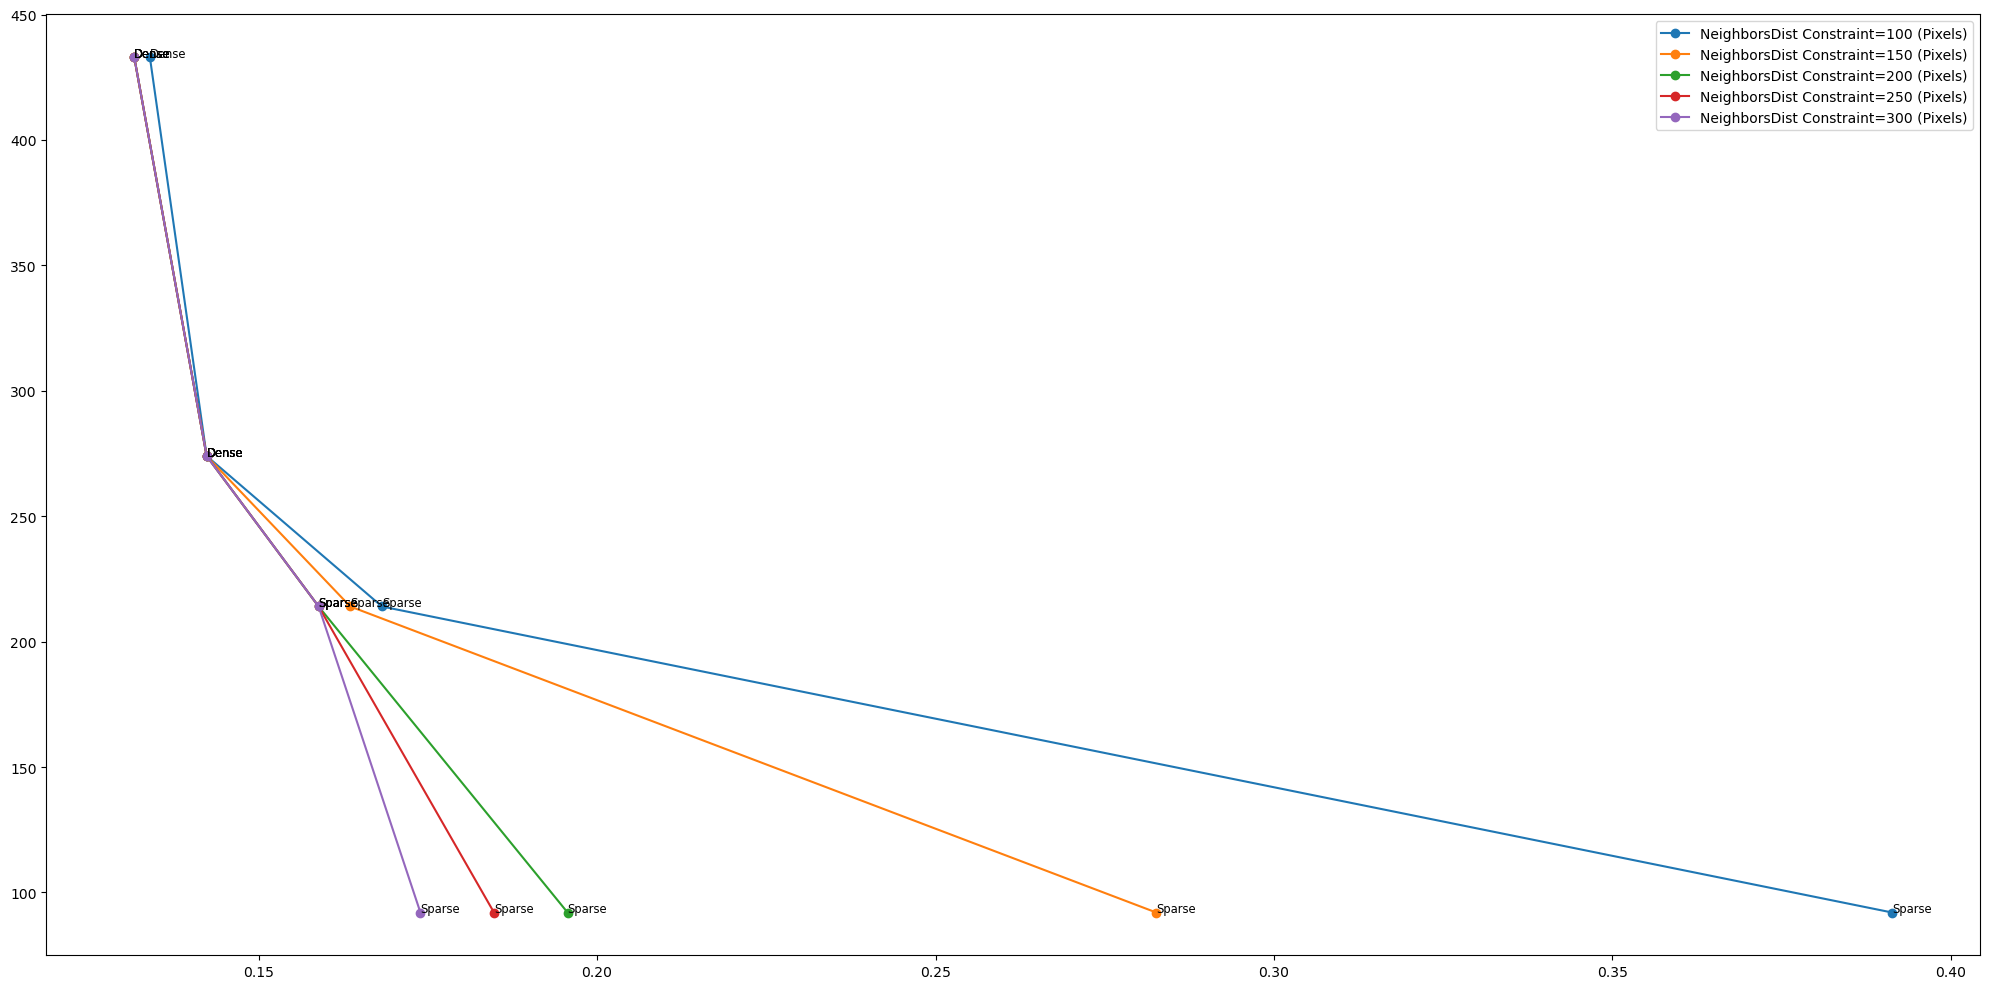

In [20]:
only_recent_death_flag_for_neighbors_calc = False
sliding_time_window_size = 20
# neighbors_dist_threshold = 250
meta_data_file_full_path = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/2023ExperimentsMetaData.csv"
meta_data_df = pd.read_csv(meta_data_file_full_path)
fig, axis = plt.subplots(figsize=(20, 10))
exp_density_levels_by_exp_name = {}

for neighbors_dist_threshold in (100, 150, 200, 250, 300):
    p_nucs_by_exp_name = {}
    global_density_by_exp_name = {}
    for exp_name in exp_names:
        exp_density_levels_by_exp_name[exp_name] = 'Dense' if 'dense' in exp_name.lower() else 'Sparse'
        print(f"Analyzing exp: {exp_name}")
        file_full_path = os.path.join(exps_dir_name, exp_name)
        p_nuc_by_time, p_prop_by_time, p_nuc_global, p_prop_global, \
                all_frames_nucleators_mask, all_frames_propagators_mask, \
                accumulated_fraction_of_death_by_time = \
                    calc_single_experiment_temporal_p_nuc_and_p_prop_and_endpoint_readouts_explicit_temporal_resolution(
                        single_exp_full_path=file_full_path,
                        dist_threshold = neighbors_dist_threshold,
                        sliding_time_window_size=sliding_time_window_size,
                        only_recent_death_flag_for_neighbors_calc=only_recent_death_flag_for_neighbors_calc,
                    meta_data_path=meta_data_file_full_path)
        print(f"NI: {p_nuc_global}\n{'#'*30}")
        exp_meta_data = meta_data_df[meta_data_df['File Name'] == exp_name]
        global_density_by_exp_name[exp_name] = exp_meta_data['Density(#Cells)'].values[0]
        p_nucs_by_exp_name[exp_name] = p_nuc_global

    sorted_values = list(zip(*list(sorted(zip(list(global_density_by_exp_name.values()), list(p_nucs_by_exp_name.values()))))))
    axis.plot(sorted_values[1], sorted_values[0], label=f"NeighborsDist Constraint={neighbors_dist_threshold} (Pixels)", marker='o')
    for exp_name, exp_density_tag in exp_density_levels_by_exp_name.items():
        exp_density, exp_p_nuc = global_density_by_exp_name[exp_name], p_nucs_by_exp_name[exp_name]
        print(exp_density, exp_p_nuc, exp_density_tag)
        axis.text(exp_p_nuc, exp_density, exp_density_tag, {'fontsize': 'small'})

plt.legend()
plt.tight_layout()
plt.show()

# NRF calculation

### Investigating parameters effects
#### investigating effects of sliding time window size

calculating NRF with sliding time window: 10
analyzing experiment: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv
Randomizing cells' TODs - permutation #0
Randomizing cells' TODs - permutation #1


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

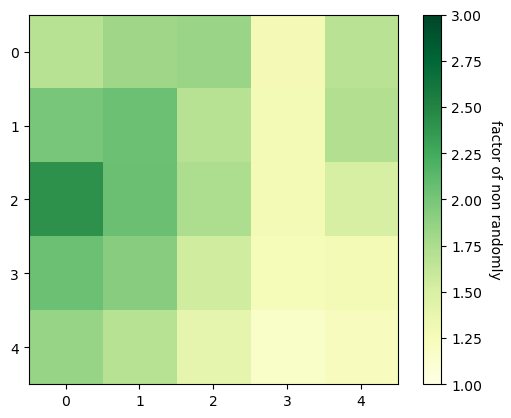

In [4]:
all_data_dir = os.path.join(os.sep, 'Users', 'yishaiazabary', 'PycharmProjects', 'University',
                                'CellDeathQuantification', 'Data',
                                '2023 data')
experiments_main_dir_path = os.path.join(all_data_dir, 'OriginalTimeFramesData')
meta_data_file_path = os.path.join(all_data_dir, '2023ExperimentsMetaData.csv')
# exp_names = list(filter(lambda x: x.endswith('.csv'), os.listdir(experiments_main_dir_path)))
# exp_names = [
#     "20230314_ML_Sytox1_no_reapearing_death_events.csv",
#     "20230314_ML_Sytox2_no_reapearing_death_events.csv"
# ]
# exp_names = [
#     "20230314_ML_Sytox1_no_reapearing_death_events_short.csv",
#     "20230314_ML_Sytox1_no_reapearing_death_events_short2.csv"
# ]
root_results_dir = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Results/NonRandomalityFactorResults"
for sliding_time_window_size in (10, 15, 20, 30): #
    print(f"calculating NRF with sliding time window: {sliding_time_window_size}")
    dir_path_to_save_nrf_plots = os.path.join(
        root_results_dir,
        f"sliding_time_window_{sliding_time_window_size}" if sliding_time_window_size is not None else f"no_sliding_time_window"
    )
    exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
        dir_path_to_save_nrf_plots=dir_path_to_save_nrf_plots,
        exp_name=exp_names,
        exps_dir_path=experiments_main_dir_path,
        max_number_of_dead_neighbors_to_calc=5,
        max_delta_tod_from_recently_dead_neighbor=5,
        meta_data_full_file_path=meta_data_file_path,
        save_fig=True,
        show_fig=False,
        sliding_time_window_size=sliding_time_window_size,
        number_of_random_permutations=2,
        include_only_treatments=['FAC'],
        fig_v_min=1.,
        fig_v_max=3.
    )

#### investigating effects of neighbors distance threshold

In [7]:
all_data_dir = os.path.join(os.sep, 'Users', 'yishaiazabary', 'PycharmProjects', 'University',
                                'CellDeathQuantification', 'Data',
                                '2023 data')
experiments_main_dir_path = os.path.join(all_data_dir, 'OriginalTimeFramesData')
meta_data_file_path = os.path.join(all_data_dir, '2023ExperimentsMetaData.csv')
# exp_names = list(filter(lambda x: x.endswith('.csv'), os.listdir(experiments_main_dir_path)))
# exp_names = [
#     "20230314_ML_Sytox1_no_reapearing_death_events.csv",
#     "20230314_ML_Sytox2_no_reapearing_death_events.csv"
# ]
# exp_names = [
#     "20230314_ML_Sytox1_no_reapearing_death_events_short.csv",
#     "20230314_ML_Sytox1_no_reapearing_death_events_short2.csv"
# ]
root_results_dir = "/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Results/NonRandomalityFactorResults"
for neighbors_dist_threshold in (100, 150, 200, 250, 300): #
    print(f"calculating NRF with neighbors distance threshold: {neighbors_dist_threshold}")
    dir_path_to_save_nrf_plots = os.path.join(
        root_results_dir,
        f"neighbors_dist_threshold_{neighbors_dist_threshold}"
    )
    exps_results_dicts = calc_factor_of_propagation_by_number_of_dead_neighbors_and_time_from_recent_neighbors_death(
        dir_path_to_save_nrf_plots=dir_path_to_save_nrf_plots,
        exp_name=exp_names,
        exps_dir_path=experiments_main_dir_path,
        max_number_of_dead_neighbors_to_calc=5,
        max_delta_tod_from_recently_dead_neighbor=5,
        meta_data_full_file_path=meta_data_file_path,
        save_fig=True,
        show_fig=False,
        dist_threshold=neighbors_dist_threshold,
        sliding_time_window_size=15,
        number_of_random_permutations=1000,
        include_only_treatments=['FAC'],
        fig_v_min=1.,
        fig_v_max=3.
    )

calculating NRF with neighbors distance threshold: 100
analyzing experiment: 5-11-23_10agreennuclei_facnbso+ml162_computational001_crop_2023_05_11_dense_colony_death_times_no_reapearing_death_events.csv


KeyboardInterrupt: 

In [7]:
# t_df = pd.read_csv("/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData/20230314_ML_Sytox1_no_reapearing_death_events.csv")
# t_df_short = t_df[t_df['death_time']>90]

In [8]:
# t_df.to_csv("/Users/yishaiazabary/PycharmProjects/University/CellDeathQuantification/Data/2023 data/OriginalTimeFramesData/20230314_ML_Sytox1_no_reapearing_death_events_short2.csv")